In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [42]:
Matches=pd.read_csv("matches.csv")

In [43]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [44]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [45]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [46]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [47]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [48]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

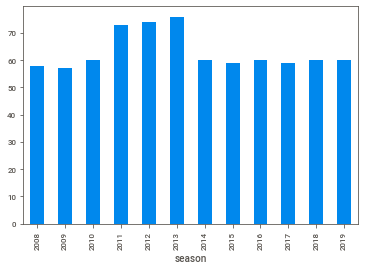

In [49]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [50]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [51]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

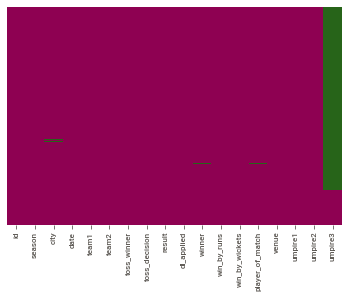

In [52]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [53]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [54]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

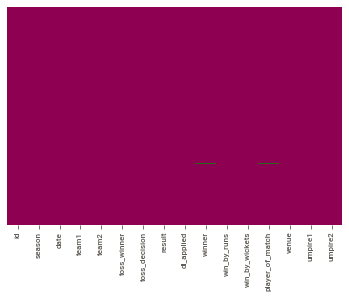

In [55]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Delhi capitals(DC) and Rajastan Royals(RR).so we only want information between the matches that had take place between them.

In [56]:
DC_RR1=Matches.loc[(Matches['team1']=='Delhi Daredevils')&(Matches['team2'] =='Rajasthan Royals')]
DC_RR1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
202,203,2010,Delhi,2010-03-31,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
344,345,2012,Delhi,2012-04-29,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
432,433,2013,Jaipur,2013-05-07,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,9,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,RJ Tucker,NaN
479,480,2014,Delhi,2014-05-03,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla,SS Hazare,S Ravi,NaN
522,523,2015,Delhi,2015-04-12,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,DJ Hooda,Feroz Shah Kotla,SD Fry,CB Gaffaney,NaN
667,7925,2018,Delhi,02/05/18,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Daredevils,4,0,RR Pant,Feroz Shah Kotla,O Nandan,Virender Kumar Sharma,Bruce Oxenford


In [57]:
DC_RR2=Matches.loc[(Matches['team2']=='Delhi Daredevils')&(Matches['team1'] =='Rajasthan Royals')]

In [58]:
DC_RR2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
179,180,2010,Ahmedabad,2010-03-15,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,V Sehwag,"Sardar Patel Stadium, Motera",BG Jerling,RE Koertzen,NaN
348,349,2012,Jaipur,2012-05-01,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,6,P Negi,Sawai Mansingh Stadium,JD Cloete,SJA Taufel,NaN
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
497,498,2014,Ahmedabad,2014-05-15,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,62,0,AM Rahane,"Sardar Patel Stadium, Motera",S Ravi,RJ Tucker,NaN
552,553,2015,Mumbai,2015-05-03,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,14,0,AM Rahane,Brabourne Stadium,HDPK Dharmasena,CB Gaffaney,NaN
641,7899,2018,Jaipur,11/04/18,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,K Ananthapadmanabhan,Rod Tucker,Nitin Menon


# Delhi Dardevils changed from dardevils to capitals in 2019

In [59]:
DC_RR3=Matches.loc[(Matches['team2']=='Delhi Capitals')&(Matches['team1'] =='Rajasthan Royals')]

In [60]:
DC_RR3

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
735,11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium,S Ravi,Nanda Kishore,Yeshwant Barde
748,11344,2019,Delhi,04/05/19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon


In [61]:
DC_RR=DC_RR1.append(DC_RR2)

In [62]:
DC_RR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
202,203,2010,Delhi,2010-03-31,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
344,345,2012,Delhi,2012-04-29,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
432,433,2013,Jaipur,2013-05-07,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,9,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,RJ Tucker,NaN
479,480,2014,Delhi,2014-05-03,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla,SS Hazare,S Ravi,NaN
522,523,2015,Delhi,2015-04-12,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,DJ Hooda,Feroz Shah Kotla,SD Fry,CB Gaffaney,NaN
667,7925,2018,Delhi,02/05/18,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Daredevils,4,0,RR Pant,Feroz Shah Kotla,O Nandan,Virender Kumar Sharma,Bruce Oxenford


In [63]:
Dc_Rr=DC_RR.append(DC_RR3)

In [64]:
Dc_Rr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
202,203,2010,Delhi,2010-03-31,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
344,345,2012,Delhi,2012-04-29,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
432,433,2013,Jaipur,2013-05-07,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,9,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,RJ Tucker,NaN
479,480,2014,Delhi,2014-05-03,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla,SS Hazare,S Ravi,NaN
522,523,2015,Delhi,2015-04-12,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,DJ Hooda,Feroz Shah Kotla,SD Fry,CB Gaffaney,NaN
667,7925,2018,Delhi,02/05/18,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Daredevils,4,0,RR Pant,Feroz Shah Kotla,O Nandan,Virender Kumar Sharma,Bruce Oxenford


In [65]:
Dc_Rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 92 to 748
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               20 non-null     int64 
 1   season           20 non-null     int64 
 2   city             20 non-null     object
 3   date             20 non-null     object
 4   team1            20 non-null     object
 5   team2            20 non-null     object
 6   toss_winner      20 non-null     object
 7   toss_decision    20 non-null     object
 8   result           20 non-null     object
 9   dl_applied       20 non-null     int64 
 10  winner           20 non-null     object
 11  win_by_runs      20 non-null     int64 
 12  win_by_wickets   20 non-null     int64 
 13  player_of_match  20 non-null     object
 14  venue            20 non-null     object
 15  umpire1          20 non-null     object
 16  umpire2          20 non-null     object
 17  umpire3          4 non-null      ob

# # Complete details of matches that takes placed between RR and DC

In [66]:
Dc_Rr.describe

<bound method NDFrame.describe of         id  season          city        date             team1  \
92      93    2008        Jaipur  2008-05-11  Delhi Daredevils   
132    133    2009     Centurion  2009-04-28  Delhi Daredevils   
164    165    2009  Bloemfontein  2009-05-17  Delhi Daredevils   
202    203    2010         Delhi  2010-03-31  Delhi Daredevils   
240    241    2011        Jaipur  2011-04-12  Delhi Daredevils   
344    345    2012         Delhi  2012-04-29  Delhi Daredevils   
432    433    2013        Jaipur  2013-05-07  Delhi Daredevils   
479    480    2014         Delhi  2014-05-03  Delhi Daredevils   
522    523    2015         Delhi  2015-04-12  Delhi Daredevils   
667   7925    2018         Delhi    02/05/18  Delhi Daredevils   
61      62    2008         Delhi  2008-04-19  Rajasthan Royals   
114    115    2008        Mumbai  2008-05-30  Rajasthan Royals   
179    180    2010     Ahmedabad  2010-03-15  Rajasthan Royals   
348    349    2012        Jaipur  2012-05-

In [67]:
print("No of matches that takes place between RR and DC:",len(Dc_Rr))

No of matches that takes place between RR and DC: 20


#  Below plot gives the details of the match that takes place between DC and RR

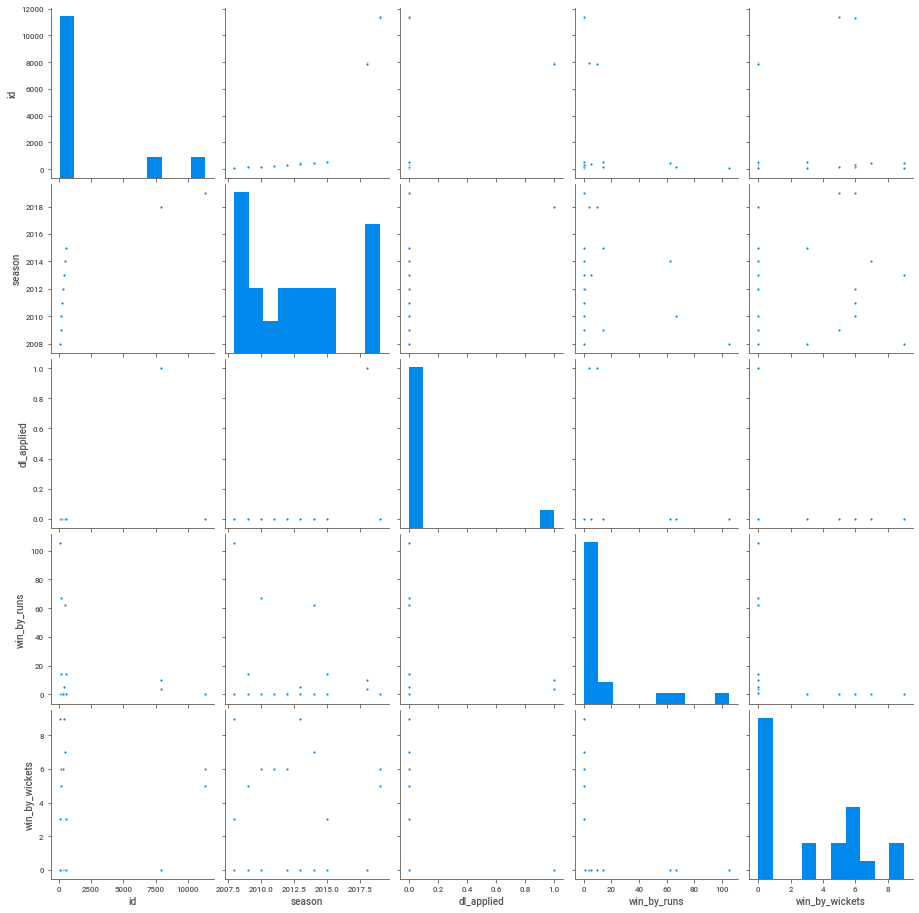

In [68]:
sns.pairplot(Dc_Rr)

#  It looks like  DC won the Toss 12 Times and 8 Times SRH won the Toss

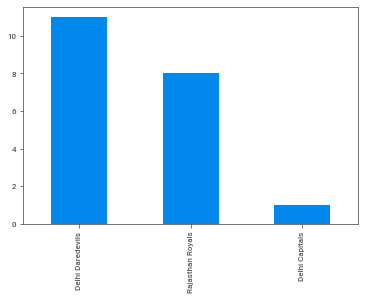

In [69]:
Dc_Rr['toss_winner'].value_counts().plot(kind='bar')

# DC went on to win the match 3 times when they decided to  field first and 6 times on batting first against RR .so total it is (DC=won-9,loss-11)whereas for RR they won the match 7 times by fielding first and won 4 times by batting first against DC.so it is (RR=won-11,loss=9)

In [70]:
Dc_Rr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
202,203,2010,Delhi,2010-03-31,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
240,241,2011,Jaipur,2011-04-12,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,6,SK Warne,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
344,345,2012,Delhi,2012-04-29,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
432,433,2013,Jaipur,2013-05-07,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,9,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,RJ Tucker,NaN
479,480,2014,Delhi,2014-05-03,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla,SS Hazare,S Ravi,NaN
522,523,2015,Delhi,2015-04-12,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,DJ Hooda,Feroz Shah Kotla,SD Fry,CB Gaffaney,NaN
667,7925,2018,Delhi,02/05/18,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Daredevils,4,0,RR Pant,Feroz Shah Kotla,O Nandan,Virender Kumar Sharma,Bruce Oxenford


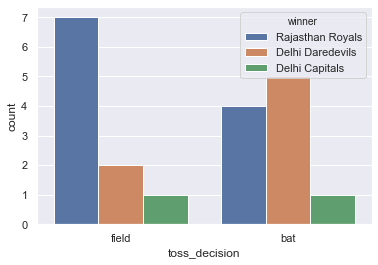

In [71]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.countplot(x='toss_decision',hue="winner",data=Dc_Rr)

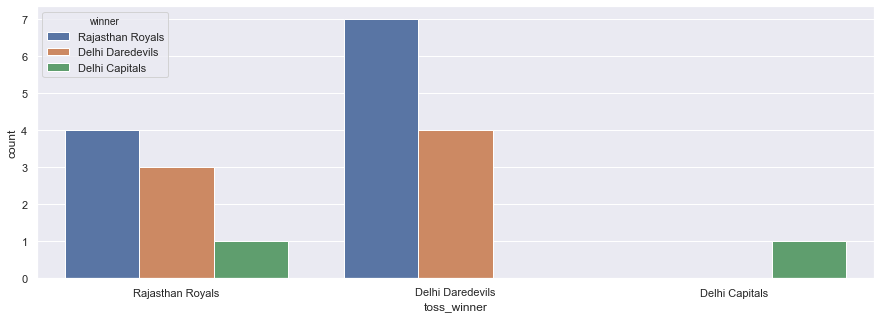

In [72]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=Dc_Rr)

In [73]:
print("No of times toss won by both teams:")
Dc_Rr['toss_winner'].value_counts()

No of times toss won by both teams:


Delhi Daredevils    11
Rajasthan Royals     8
Delhi Capitals       1
Name: toss_winner, dtype: int64

# correlation between Columns in Matches Dataset

In [74]:
Dc_Rr.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.813147,0.502785,-0.200126,-0.003754
season,0.813147,1.000000,0.483737,-0.270692,-0.088138
dl_applied,0.502785,0.483737,1.000000,-0.083895,-0.332940
win_by_runs,-0.200126,-0.270692,-0.083895,1.000000,-0.499237
win_by_wickets,-0.003754,-0.088138,-0.332940,-0.499237,1.000000


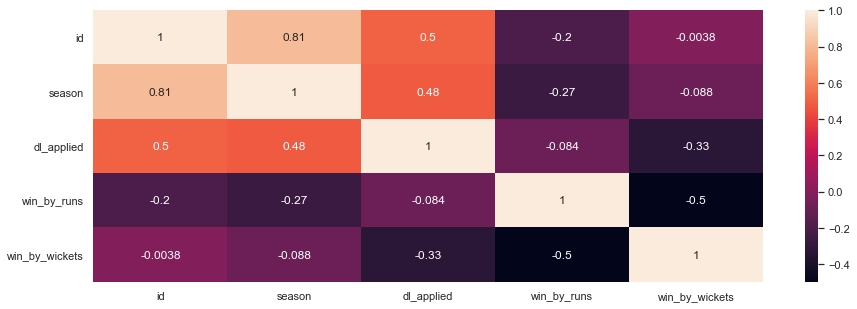

In [75]:
sns.heatmap(Dc_Rr.corr(),yticklabels=True,annot=True)

In [76]:
Dc_Rr['winner']=pd.get_dummies(Dc_Rr['winner'])

In [77]:
Dc_Rr.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,0,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,0,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN


# Using Sweetviz we can get details about the Matches

In [78]:
import sweetviz 
my_report=sweetviz.analyze([Dc_Rr,'Dc_Rr'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [81]:
my_report.show_html("Report1.html")

In [80]:
Link--------->https://drive.google.com/drive/u/0/my-drive


SyntaxError: invalid syntax (<ipython-input-80-fe8de551d1c1>, line 1)

#  Now let gets into the Deliveries Dataset

In [214]:
Deliveries=pd.read_csv("deliveries.csv")

In [215]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [216]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [217]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between Delhi Capitals and  Rajastan Royals

In [218]:
Delhi_Rajastan1=Deliveries.loc[(Deliveries['batting_team' ] =='Rajasthan Royals' ) & (Deliveries['bowling_team'] == 'Delhi Daredevils')]

In [219]:
Delhi_Rajastan1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158034,7925,2,Rajasthan Royals,Delhi Daredevils,12,3,K Gowtham,RA Tripathi,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
158035,7925,2,Rajasthan Royals,Delhi Daredevils,12,4,K Gowtham,RA Tripathi,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
158036,7925,2,Rajasthan Royals,Delhi Daredevils,12,5,RA Tripathi,K Gowtham,TA Boult,0,...,0,0,0,0,0,0,0,RA Tripathi,run out,RR Pant
158037,7925,2,Rajasthan Royals,Delhi Daredevils,12,6,K Gowtham,J Archer,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [220]:
Delhi_Rajastan2=Deliveries.loc[(Deliveries['bowling_team' ] =='Rajasthan Royals' ) & (Deliveries['batting_team'] == 'Delhi Daredevils')]

In [221]:
Delhi_Rajastan2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Daredevils,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Daredevils,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Daredevils,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Daredevils,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Daredevils,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157959,7925,1,Delhi Daredevils,Rajasthan Royals,17,3,GJ Maxwell,L Plunkett,JD Unadkat,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
157960,7925,1,Delhi Daredevils,Rajasthan Royals,17,4,L Plunkett,GJ Maxwell,JD Unadkat,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
157961,7925,1,Delhi Daredevils,Rajasthan Royals,17,5,L Plunkett,GJ Maxwell,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
157962,7925,1,Delhi Daredevils,Rajasthan Royals,17,6,GJ Maxwell,L Plunkett,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [222]:
Delhi_Rajastan3=Deliveries.loc[(Deliveries['bowling_team' ] =='Rajasthan Royals' ) & (Deliveries['batting_team'] == 'Delhi Capitals')]

In [223]:
Delhi_Rajastan3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
174333,11331,2,Delhi Capitals,Rajasthan Royals,1,1,P Shaw,S Dhawan,STR Binny,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174334,11331,2,Delhi Capitals,Rajasthan Royals,1,2,P Shaw,S Dhawan,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174335,11331,2,Delhi Capitals,Rajasthan Royals,1,3,S Dhawan,P Shaw,STR Binny,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174336,11331,2,Delhi Capitals,Rajasthan Royals,1,4,S Dhawan,P Shaw,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174337,11331,2,Delhi Capitals,Rajasthan Royals,1,5,P Shaw,S Dhawan,STR Binny,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177388,11344,2,Delhi Capitals,Rajasthan Royals,16,3,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177389,11344,2,Delhi Capitals,Rajasthan Royals,16,4,AR Patel,RR Pant,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177390,11344,2,Delhi Capitals,Rajasthan Royals,16,5,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177391,11344,2,Delhi Capitals,Rajasthan Royals,16,6,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [224]:
Delhi_Rajastan4=Deliveries.loc[(Deliveries['batting_team' ] =='Rajasthan Royals' ) & (Deliveries['bowling_team'] == 'Delhi Capitals')]

In [225]:
D_R1=Delhi_Rajastan1.append(Delhi_Rajastan2)

In [226]:
D_R2=Delhi_Rajastan3.append(Delhi_Rajastan4)

In [227]:
Delhi_Capitials_Rajastan_Royals=D_R1.append(D_R2)

# Complete Details Of Delhi vs Rajastan

In [228]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# using Match_id we can summarize that 20 matches were played between RR and DC

In [232]:
Delhi_Capitials_Rajastan_Royals['match_id'].value_counts()

553      255
523      252
498      251
165      251
385      248
345      247
93       245
11331    241
133      240
241      238
433      237
480      235
203      233
180      232
11344    224
115      223
62       219
349      216
7925     184
7899     146
Name: match_id, dtype: int64

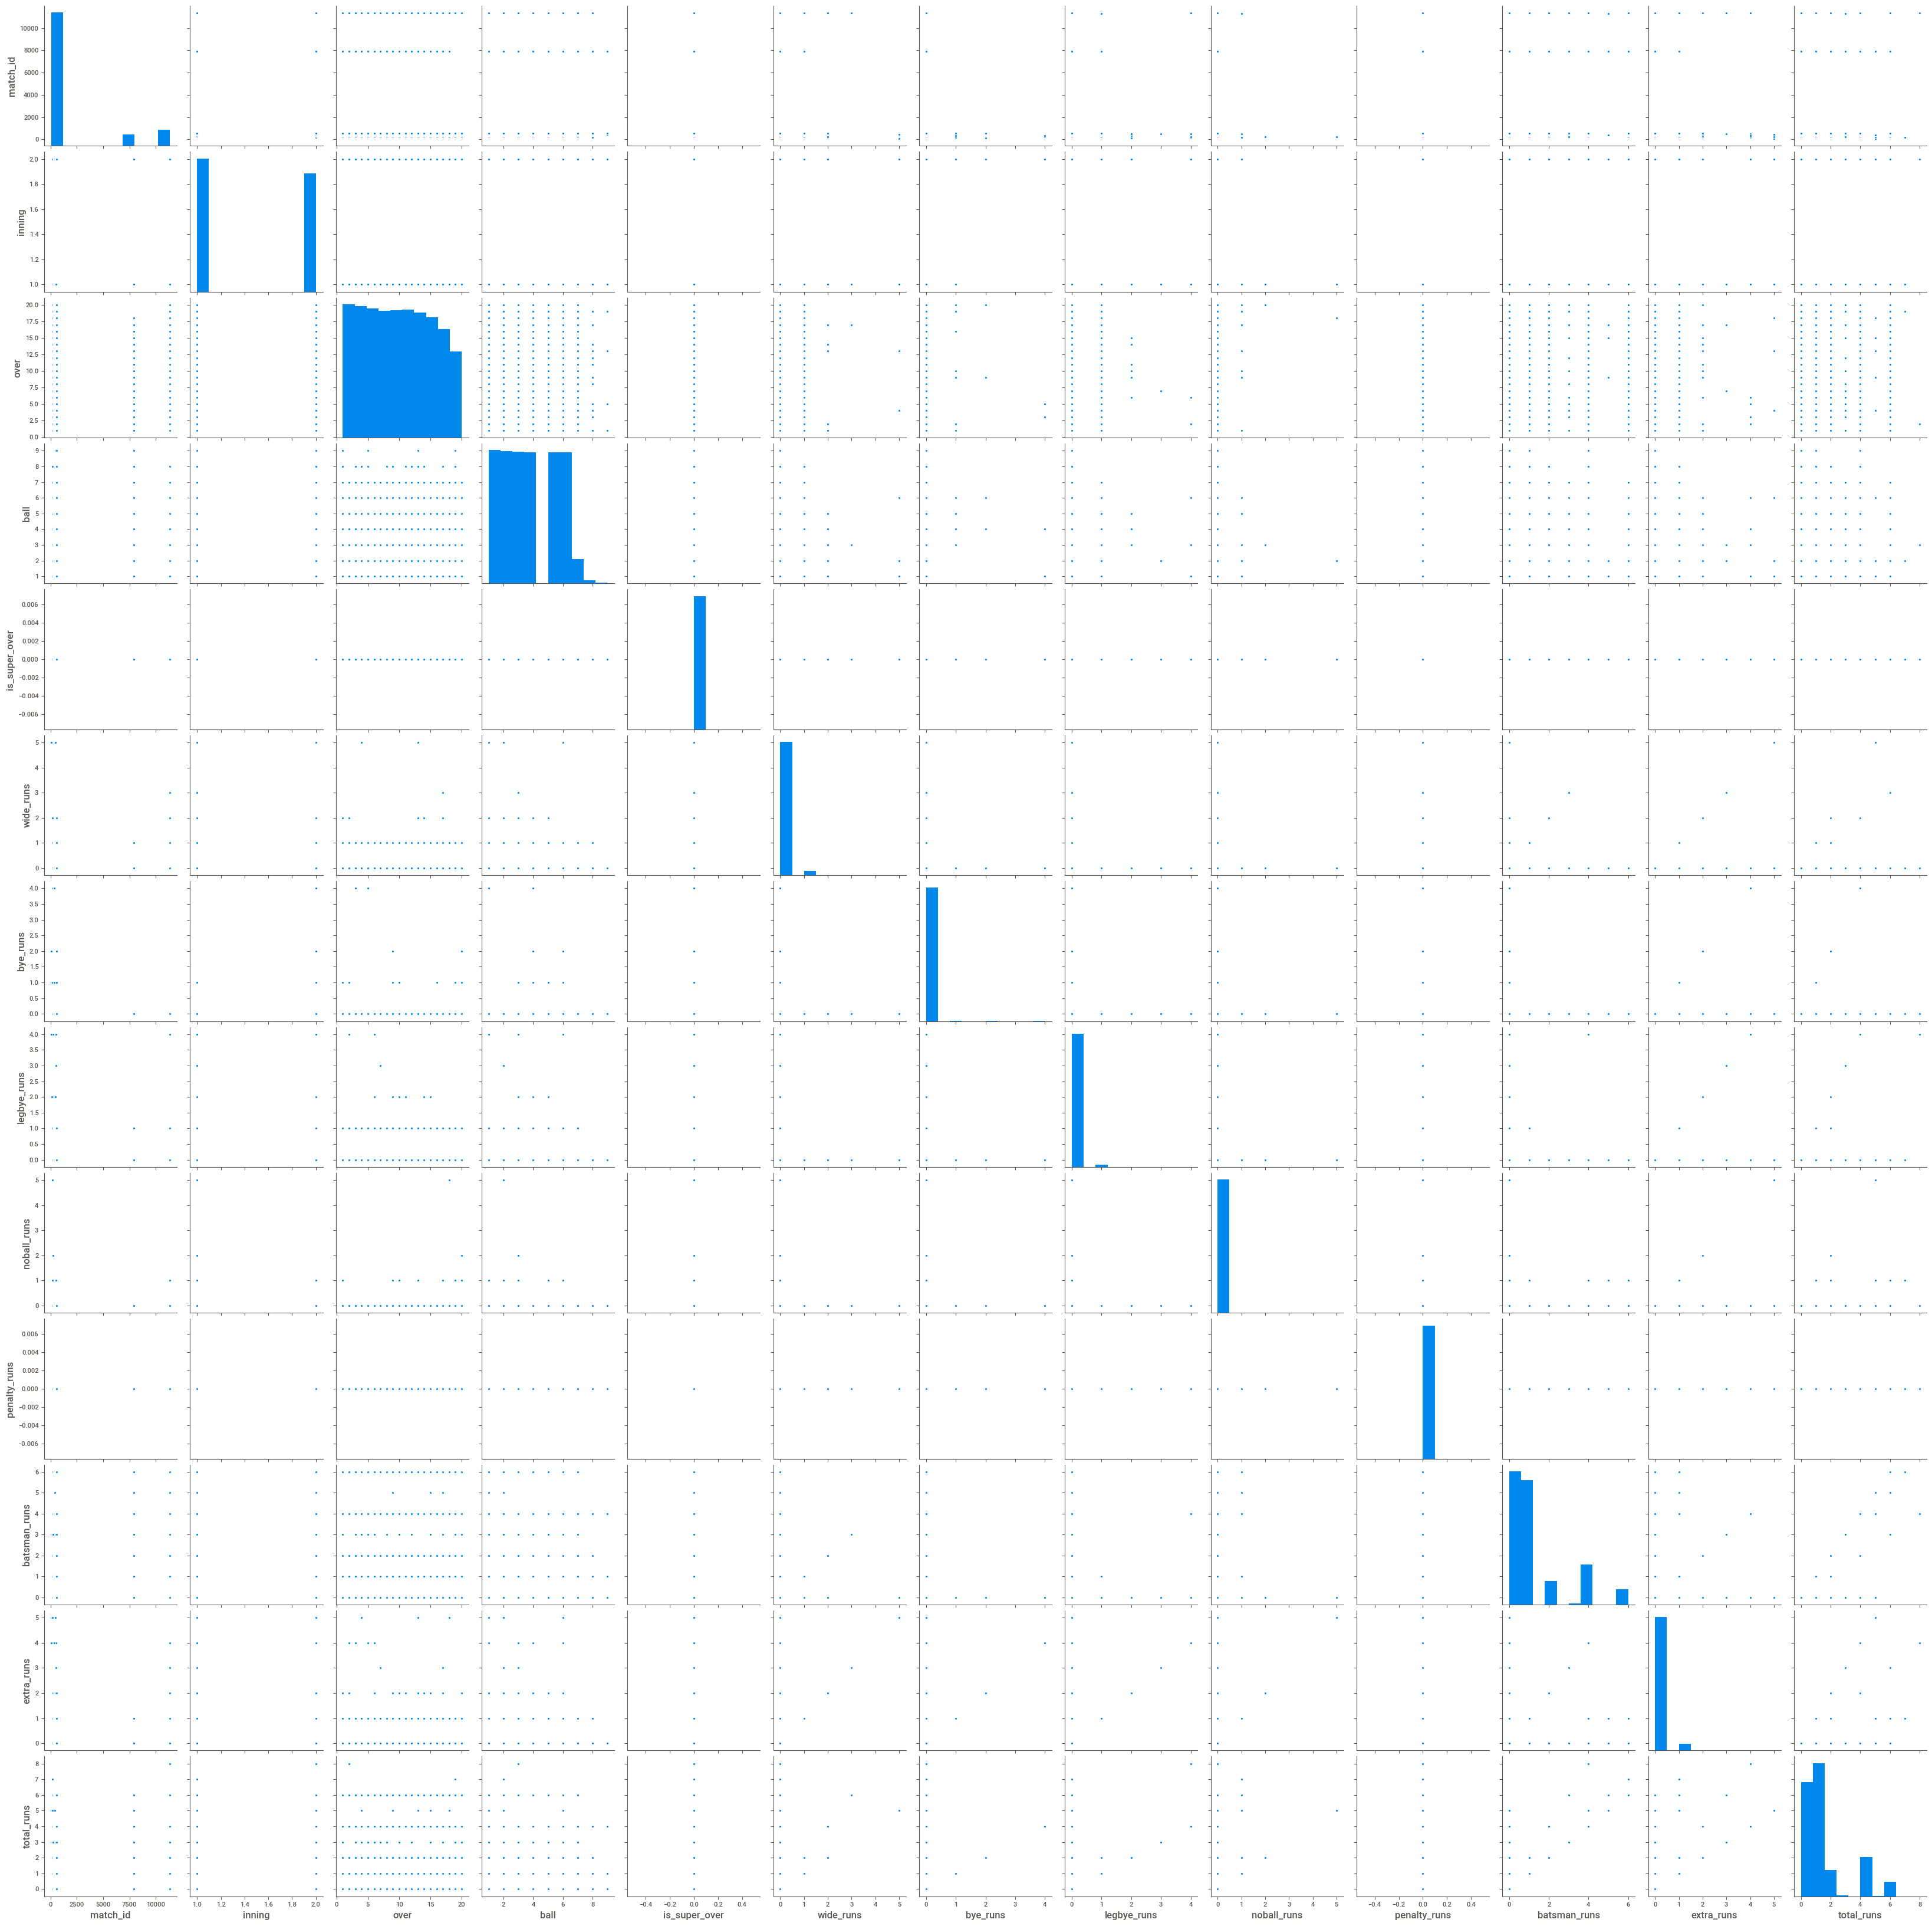

In [197]:
sns.pairplot(Delhi_Capitials_Rajastan_Royals)

In [198]:
Delhi_Capitials_Rajastan_Royals.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.042703,-0.039887,-0.006023,NaN,-0.007189,-0.019520,-0.023387,-0.015737,NaN,0.052761,-0.029573,0.047109
inning,-0.042703,1.000000,-0.079192,0.005615,NaN,0.017926,0.025808,0.003413,-0.003957,NaN,-0.008232,0.021639,-0.003905
over,-0.039887,-0.079192,1.000000,-0.011328,NaN,-0.013739,-0.009164,-0.014752,0.025909,NaN,0.096945,-0.013484,0.094828
ball,-0.006023,0.005615,-0.011328,1.000000,NaN,-0.003299,0.004659,-0.014860,-0.021076,NaN,-0.005013,-0.015773,-0.008237
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.007189,0.017926,-0.013739,-0.003299,NaN,1.000000,-0.006997,-0.018333,-0.007471,NaN,-0.104080,0.689595,0.034828
bye_runs,-0.019520,0.025808,-0.009164,0.004659,NaN,-0.006997,1.000000,-0.005117,-0.002085,NaN,-0.034634,0.308949,0.027675
legbye_runs,-0.023387,0.003413,-0.014752,-0.014860,NaN,-0.018333,-0.005117,1.000000,-0.005463,NaN,-0.075094,0.566621,0.039108
noball_runs,-0.015737,-0.003957,0.025909,-0.021076,NaN,-0.007471,-0.002085,-0.005463,1.000000,NaN,-0.011885,0.288259,0.046380
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

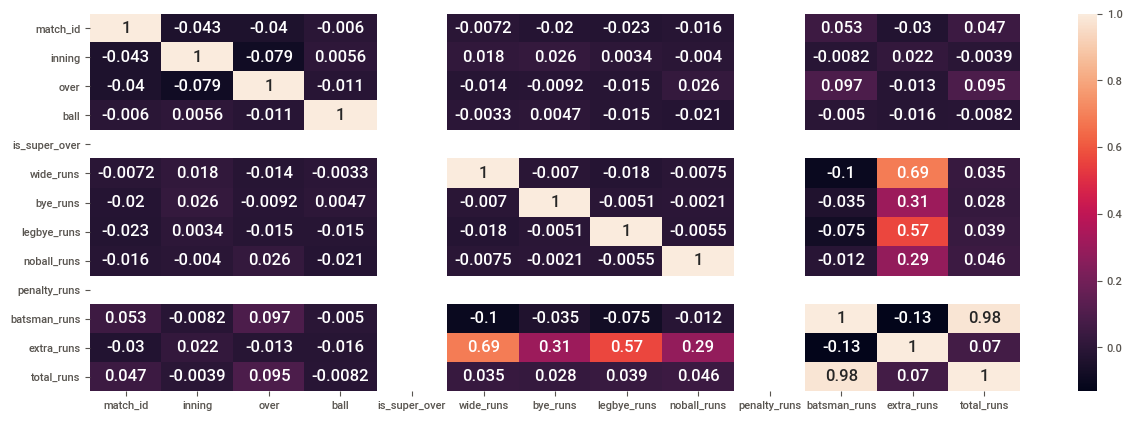

In [101]:
sns.heatmap(Delhi_Capitials_Rajastan_Royals.corr(),yticklabels=True,annot=True)

In [100]:
Delhi_Capitials_Rajastan_Royals.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.0,4617.000000,4617.000000,4617.000000,4617.000000,4617.0,4617.000000,4617.000000,4617.000000
mean,1956.757635,1.470435,9.971193,3.618583,0.0,0.036171,0.004548,0.021876,0.004548,0.0,1.263158,0.067143,1.330301
std,3700.320774,0.499179,5.603160,1.811486,0.0,0.228475,0.102930,0.188944,0.096409,0.0,1.612026,0.324206,1.601917
min,62.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,165.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,523.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,11344.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,4.000000,5.000000,0.0,6.000000,5.000000,8.000000


In [201]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#  How many Runs will delhi score in this powerplay?

In [103]:
Delhi_pp_Score=Delhi_Rajastan2.append(Delhi_Rajastan3)

In [109]:
Delhi_pp_Score

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Daredevils,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Daredevils,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Daredevils,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Daredevils,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Daredevils,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177388,11344,2,Delhi Capitals,Rajasthan Royals,16,3,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177389,11344,2,Delhi Capitals,Rajasthan Royals,16,4,AR Patel,RR Pant,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177390,11344,2,Delhi Capitals,Rajasthan Royals,16,5,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177391,11344,2,Delhi Capitals,Rajasthan Royals,16,6,RR Pant,AR Patel,S Gopal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Filtering the overs between 1-6 to get the powerplay runs

In [123]:
Delhi_pp_Score1=Delhi_pp_Score.loc[(Delhi_pp_Score['over']<=6)]

In [146]:
Delhi_pp_Score1.head(30)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14457,62,2,Delhi Daredevils,Rajasthan Royals,1,1,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14458,62,2,Delhi Daredevils,Rajasthan Royals,1,2,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14459,62,2,Delhi Daredevils,Rajasthan Royals,1,3,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14460,62,2,Delhi Daredevils,Rajasthan Royals,1,4,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14461,62,2,Delhi Daredevils,Rajasthan Royals,1,5,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14462,62,2,Delhi Daredevils,Rajasthan Royals,1,6,G Gambhir,V Sehwag,MM Patel,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14463,62,2,Delhi Daredevils,Rajasthan Royals,2,1,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14464,62,2,Delhi Daredevils,Rajasthan Royals,2,2,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14465,62,2,Delhi Daredevils,Rajasthan Royals,2,3,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14466,62,2,Delhi Daredevils,Rajasthan Royals,2,4,V Sehwag,G Gambhir,SR Watson,0,...,0,0,0,0,0,0,0,V Sehwag,bowled,NaN


In [131]:
Delhi_pp_Score1['over']

14457     1
14458     1
14459     1
14460     1
14461     1
         ..
177326    6
177327    6
177328    6
177329    6
177330    6
Name: over, Length: 748, dtype: int64

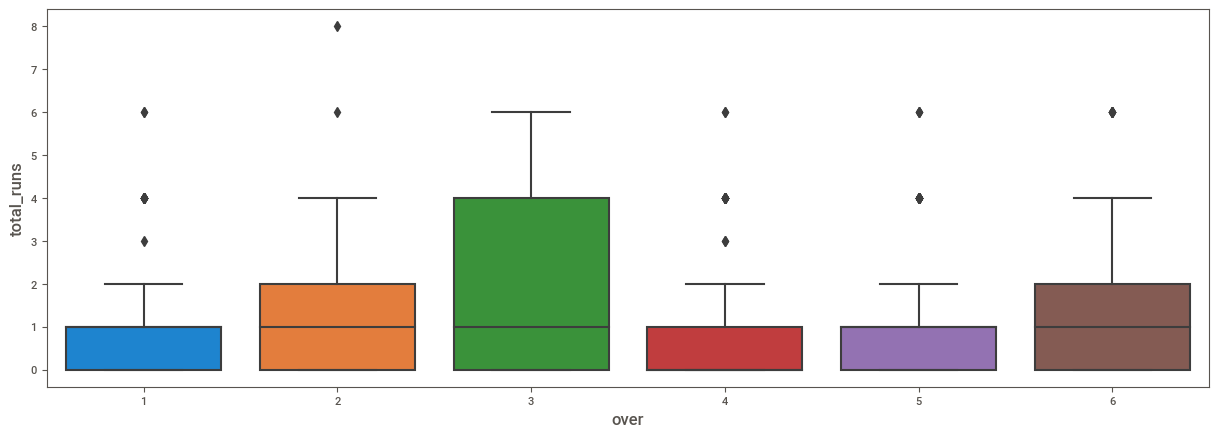

In [132]:
sns.boxplot(x='over',y='total_runs',data=Delhi_pp_Score1)

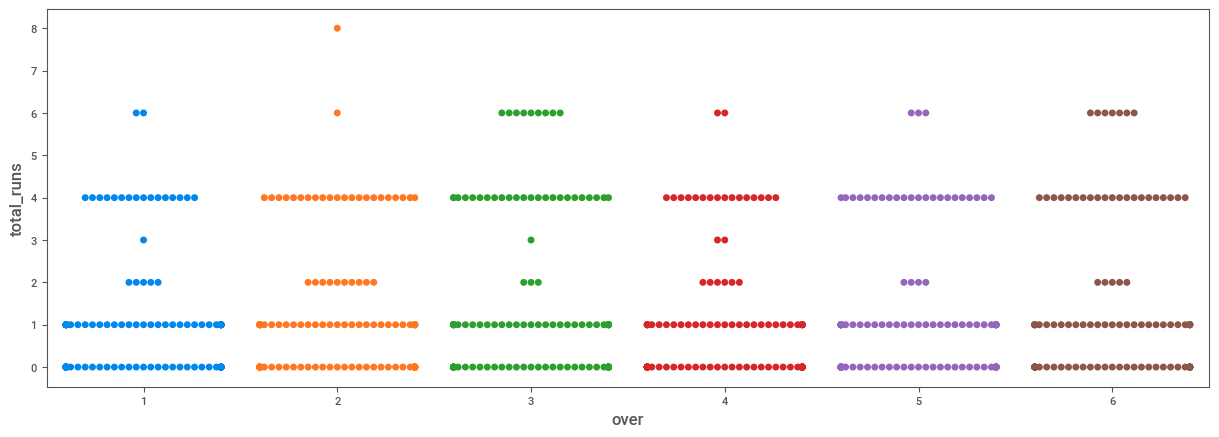

In [133]:
sns.swarmplot(x='over',y='total_runs',data=Delhi_pp_Score1)

In [134]:
Delhi_pp_Score1['total_runs'].value_counts()

0    326
1    239
4    121
2     33
6     24
3      4
8      1
Name: total_runs, dtype: int64

In [138]:
Total_score=Delhi_pp_Score1['total_runs'].sum()

In [139]:
Total_score

953

# from the Match_id we can conclude that 20 Matches were played between RR and DC

In [137]:
Delhi_pp_Score1['match_id'].value_counts()

553      40
115      39
180      39
433      39
241      38
203      38
165      38
62       38
345      37
7899     37
385      37
498      37
133      37
523      37
93       37
349      36
480      36
11344    36
11331    36
7925     36
Name: match_id, dtype: int64

# Average powerplay runs scored by Delhi Capitals against Rajastan Royals was 47.65

In [141]:
print("Average powerplay runs scored by Delhi Capitals was",Total_score/20)

Average powerplay runs scored by Delhi Capitals was 47.65


# How many Runs will Steve Smith Score?

In [147]:
Steve_Smith_runs=Delhi_Capitials_Rajastan_Royals.loc[(Delhi_Capitials_Rajastan_Royals['batsman']=='SPD Smith')]

In [148]:
Steve_Smith_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
124099,523,2,Rajasthan Royals,Delhi Daredevils,6,3,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124100,523,2,Rajasthan Royals,Delhi Daredevils,6,4,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124101,523,2,Rajasthan Royals,Delhi Daredevils,6,5,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124102,523,2,Rajasthan Royals,Delhi Daredevils,6,6,SPD Smith,AM Rahane,NM Coulter-Nile,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
124105,523,2,Rajasthan Royals,Delhi Daredevils,7,3,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
124107,523,2,Rajasthan Royals,Delhi Daredevils,7,5,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
124108,523,2,Rajasthan Royals,Delhi Daredevils,7,6,SPD Smith,AM Rahane,AD Mathews,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
124109,523,2,Rajasthan Royals,Delhi Daredevils,8,1,SPD Smith,AM Rahane,A Mishra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124110,523,2,Rajasthan Royals,Delhi Daredevils,8,2,SPD Smith,AM Rahane,A Mishra,0,...,0,0,0,0,0,0,0,SPD Smith,caught,MA Agarwal
174224,11331,1,Rajasthan Royals,Delhi Capitals,3,4,SPD Smith,AM Rahane,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# It looks like Steve_smith only played two matches against DC based on the match_id

In [151]:
Avg_score=Steve_Smith_runs['batsman_runs'].sum()

In [152]:
Avg_score

61

In [150]:
Steve_Smith_runs['match_id'].value_counts()

11331    33
523       9
Name: match_id, dtype: int64

In [156]:
print("Average run scored by steve smith against DC was",Avg_score//2)

Average run scored by steve smith against DC was 30


# Let's see how his performance against DC bowlers

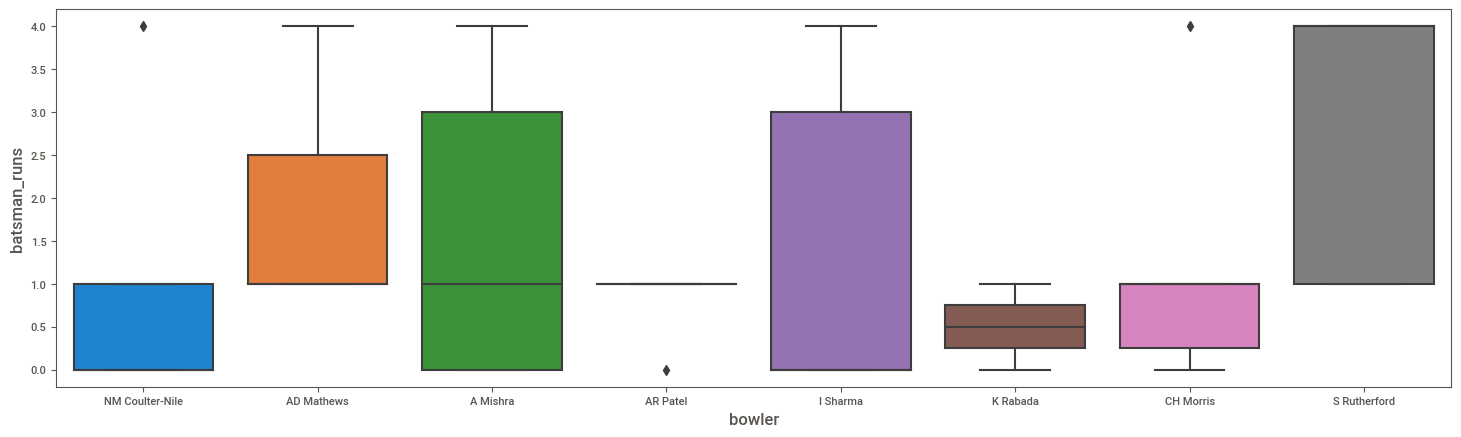

In [155]:
plt.figure(figsize=(18,5))
sns.boxplot(x='bowler',y='batsman_runs',data=Steve_Smith_runs)

# Steve_smith  ball by ball runs against DC bowlers over the years.He smashed few fours against Amit mishra(currently playing in DC).well against Rabada he only faced two balls and few scored few runs  against AR patel(Axar patel)

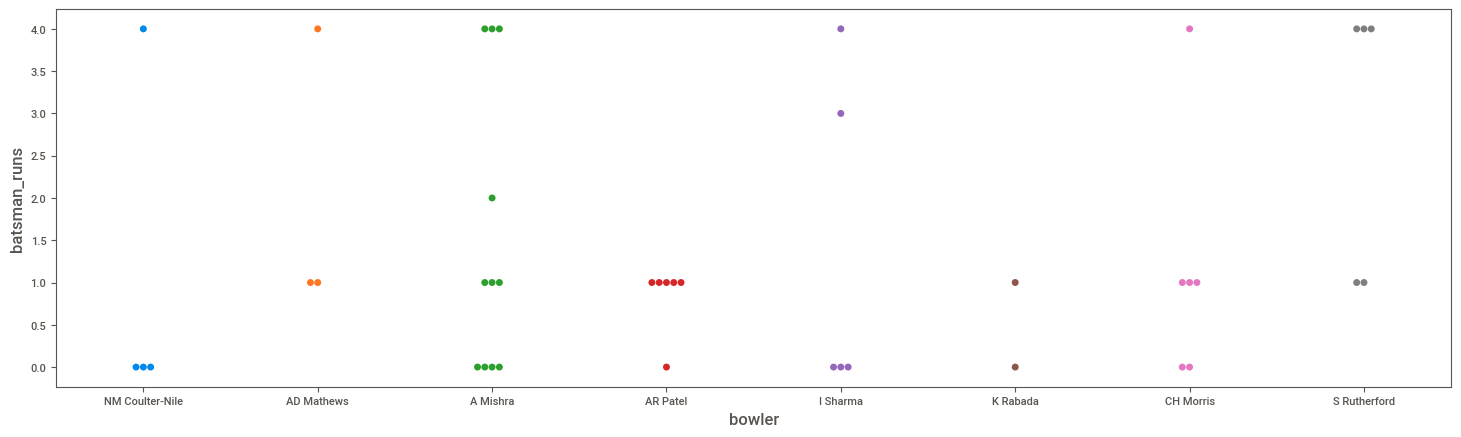

In [157]:
plt.figure(figsize=(18,5))
sns.swarmplot(x='bowler',y='batsman_runs',data=Steve_Smith_runs)

# Using sweetviz we can clearly steve_smith quite analysis against DC

In [160]:
import sweetviz as sv
Steve_Smith_runs=sv.analyze(Steve_Smith_runs)


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
:match_id:                         |█▉                   | [  9%]   00:00  -> (00:00 left)
:match_id:                         |██▊                  | [ 14%]   00:00  -> (00:02 left)
:inning:                           |██▊                  | [ 14%]   00:00  -> (00:02 left)
:inning:                           |███▊                 | [ 18%]   00:00  -> (00:03 left)
:batting_team:                     |███▊                 | [ 18%]   00:00  -> (00:03 left)
:batting_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)
:bowling_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)
:bowling_team:                     |█████▋               | [ 27%]   00:01  -> (00:04 left)
:over:                             |█████▋               | [ 27%]   00:01  -> (00:04 left

Creating Associations graph... DONE!


In [161]:
Steve_Smith_runs.show_html()

# How many wides will be bowled in the match?


In [167]:
DC_RR_Wides=Delhi_Capitials_Rajastan_Royals['wide_runs'].value_counts()

In [168]:
DC_RR_Wides

0    4471
1     135
2       7
5       3
3       1
Name: wide_runs, dtype: int64

In [171]:
Delhi_Capitials_Rajastan_Royals['wide_runs'].sum()

167

In [166]:
Delhi_Capitials_Rajastan_Royals['match_id'].value_counts()

553      255
523      252
498      251
165      251
385      248
345      247
93       245
11331    241
133      240
241      238
433      237
480      235
203      233
180      232
11344    224
115      223
62       219
349      216
7925     184
7899     146
Name: match_id, dtype: int64

In [175]:
print("Average wides bowled between DC and RR in a single match:",167//20)

Average wides bowled between DC and RR in a single match: 8


# How many wickets will taken during the entire match?

In [199]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [202]:
Delhi_Capitials_Rajastan_Royals.dropna(axis=0,inplace=True)

In [203]:
Delhi_Capitials_Rajastan_Royals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14350,62,1,Rajasthan Royals,Delhi Daredevils,3,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,T Kohli,caught,M Manhas
14358,62,1,Rajasthan Royals,Delhi Daredevils,4,5,YK Pathan,SR Watson,B Geeves,0,...,0,0,0,0,0,0,0,YK Pathan,run out,M Manhas
14373,62,1,Rajasthan Royals,Delhi Daredevils,7,2,SR Watson,M Kaif,R Bhatia,0,...,0,0,0,0,1,0,1,SR Watson,run out,S Dhawan
14398,62,1,Rajasthan Royals,Delhi Daredevils,11,3,M Kaif,RA Jadeja,R Bhatia,0,...,0,0,0,0,0,0,0,M Kaif,caught,B Geeves
21761,93,2,Rajasthan Royals,Delhi Daredevils,4,1,GC Smith,YK Pathan,MF Maharoof,0,...,0,0,0,0,0,0,0,YK Pathan,run out,AB de Villiers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177237,11344,1,Rajasthan Royals,Delhi Capitals,12,2,S Gopal,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,S Gopal,stumped,RR Pant
177238,11344,1,Rajasthan Royals,Delhi Capitals,12,3,STR Binny,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,STR Binny,caught,RR Pant
177249,11344,1,Rajasthan Royals,Delhi Capitals,14,2,K Gowtham,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,K Gowtham,caught,I Sharma
177277,11344,1,Rajasthan Royals,Delhi Capitals,18,3,I Sodhi,R Parag,TA Boult,0,...,0,0,0,0,0,0,0,I Sodhi,caught,A Mishra


In [211]:
Delhi_Capitials_Rajastan_Royals['dismissal_kind'].value_counts()

caught     130
run out     23
stumped     12
Name: dismissal_kind, dtype: int64

In [213]:
print("Average wickets taken between DC and RR in a single match",165//20)

Average wickets taken between DC and RR in a single match 8


#  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.